<a href="https://colab.research.google.com/github/adijams01/cleveland_heart_disease_classification/blob/main/binary_classification_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://raw.githubusercontent.com/adijams01/cleveland_heart_disease_classification/main/heart_cleveland_upload.csv
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
project_02 = pd.read_csv("https://raw.githubusercontent.com/adijams01/cleveland_heart_disease_classification/main/heart_cleveland_upload.csv")
project_02.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [3]:
x=project_02.drop("condition",axis=1)
y=project_02["condition"]

In [4]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0


In [5]:
len(x),len(y)

(297, 297)

In [6]:
# Creating training and testing datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,
                                               test_size=0.3,
                                               random_state=42)


In [7]:
len(x_train),len(x_test)

(207, 90)

# Modelling

## Without normalisation

### model_01

In [8]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_01=tf.keras.Sequential([
    
    tf.keras.layers.Dense(13,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(13,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid),
])

# Compile the model
model_01.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
history=model_01.fit(x_train,y_train,epochs=100,verbose=1)

Epoch 1/100
7/7 [==============================] - 3s 8ms/step - loss: 44.3286 - accuracy: 0.5411
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 33.9971 - accuracy: 0.5411
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 25.5740 - accuracy: 0.5411
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 18.2009 - accuracy: 0.5411
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 10.4222 - accuracy: 0.5411
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 3.4841 - accuracy: 0.5604
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 2.2310 - accuracy: 0.5411
Epoch 8/100
7/7 [==============================] - 0s 4ms/step - loss: 1.9673 - accuracy: 0.5556
Epoch 9/100
7/7 [==============================] - 0s 11ms/step - loss: 1.2020 - accuracy: 0.6039
Epoch 10/100
7/7 [==============================] - 0s 5ms/step - loss: 1.1838 - accuracy: 0.6280
Epoch 11/100
7/7 [=====

In [9]:
model_01.evaluate(x_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.4028 - accuracy: 0.8222


[0.4028077721595764, 0.8222222328186035]

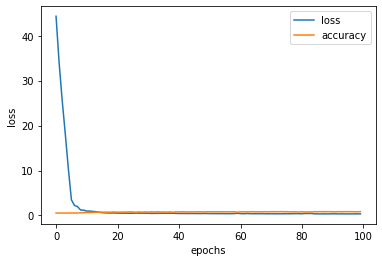

In [10]:
# Plot Loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

### model_02

3/3 [==============================] - 0s 6ms/step - loss: 0.5945 - accuracy: 0.6667


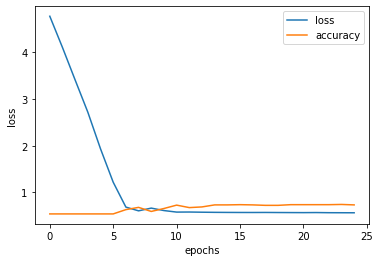

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_02=tf.keras.Sequential([
    
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid),
])

# Compile the model
model_02.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

# Fit the model
history=model_02.fit(x_train,y_train,epochs=25,verbose=0)

# Evaluation
model_02.evaluate(x_test,y_test)

# Plot Loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

### model_03

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 10ms/step - loss: 0.4460 - accuracy: 0.7889


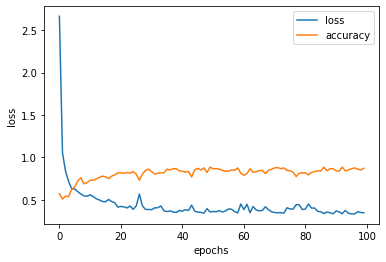

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_03=tf.keras.Sequential([
    
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid),
])

# Compile the model
model_03.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(lr=0.01),
                 metrics=['accuracy'])

# Fit the model
history=model_03.fit(x_train,y_train,epochs=100,verbose=0)

# Evaluation
model_03.evaluate(x_test,y_test)

# Plot Loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

Epoch 1/100
7/7 [==============================] - 2s 8ms/step - loss: 4.9903 - accuracy: 0.5411 - lr: 1.0000e-04
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 4.9252 - accuracy: 0.5411 - lr: 1.1220e-04
Epoch 3/100
7/7 [==============================] - 0s 9ms/step - loss: 4.8514 - accuracy: 0.5411 - lr: 1.2589e-04
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 4.7707 - accuracy: 0.5411 - lr: 1.4125e-04
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 4.6703 - accuracy: 0.5411 - lr: 1.5849e-04
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 4.5624 - accuracy: 0.5411 - lr: 1.7783e-04
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 4.4347 - accuracy: 0.5411 - lr: 1.9953e-04
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 4.2897 - accuracy: 0.5411 - lr: 2.2387e-04
Epoch 9/100
7/7 [==============================] - 0s 8ms/step - loss: 4.1253 - accuracy

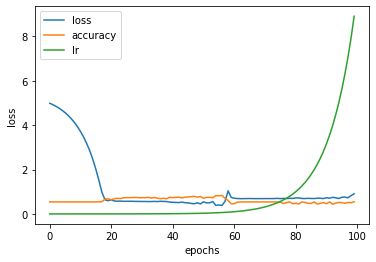

In [13]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_04=tf.keras.Sequential([
    
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid),
])

# Compile the model
model_04.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=['accuracy'])

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history=model_04.fit(x_train,
                     y_train,
                     epochs=100,
                     callbacks=[lr_scheduler])

# Evaluation
model_04.evaluate(x_test,y_test)

# Plot Loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

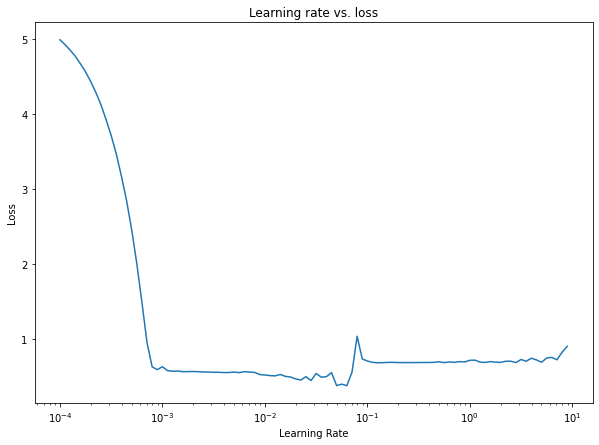

In [15]:
import numpy as np
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");

Epoch 1/100
7/7 [==============================] - 0s 4ms/step - loss: 1.9329 - accuracy: 0.5072
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 0.7539 - accuracy: 0.5362
Epoch 3/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6872 - accuracy: 0.5314
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4638
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6785 - accuracy: 0.5990
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6395 - accuracy: 0.6860
Epoch 7/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6318 - accuracy: 0.6184
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6187 - accuracy: 0.6908
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 0.6014 - accuracy: 0.7295
Epoch 10/100
7/7 [==============================] - 0s 4ms/step - loss: 0.5980 - accuracy: 0.6812
Epoch 11/100
7/7 [===========

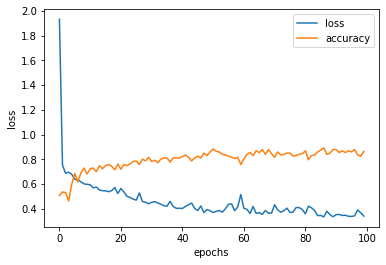

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_05=tf.keras.Sequential([
    
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid),
])

# Compile the model
model_05.compile(loss=tf.keras.losses.binary_crossentropy,
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
                 metrics=['accuracy'])

# Fit the model
history=model_05.fit(x_train,y_train,epochs=100,verbose=1)

# Evaluation
model_05.evaluate(x_test,y_test)

# Plot Loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [25]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_05.predict(x_test)

# Create a confusion matrix
confusion_matrix(y_test, tf.round(y_preds))

3/3 [==============================] - 0s 5ms/step


array([[37, 11],
       [ 6, 36]])

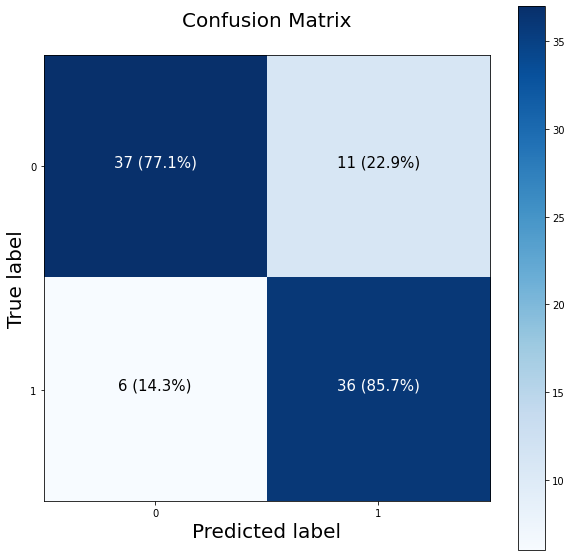

In [26]:
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)